In [1]:
#importing all neccessary libraries 
import pandas as pd
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Prepare the Data

In [2]:
#declaring all the paths were the csv file is located 
mouse_metadata_path = ('data/Mouse_metadata.csv')
study_results_path = ('data/Study_results.csv')

#creating dataframes for mouse_metadata and study_results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

#combine mouse_metadata_df and study_results_df into a single dataframe
merged_df = pd.merge(study_results_df, mouse_metadata_df, on = 'Mouse ID', how='outer')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
#Display the number of unique mice IDs in the data
merged_df['Mouse ID'].nunique()

249

In [4]:
# Get all the data for the duplicate mouse ID. 
duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'] != 'g989'].drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
unique_mouse = clean_df['Mouse ID'].nunique()
unique_mouse

248

# Generate Summary Statistics

In [7]:
#Use groupby and summary statistical methods to calculate 
#the following properties of each drug regimen mean 
drug_regimen_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_regimen_mean 

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
#Use groupby and summary statistical methods to calculate median of the tumor volume
drug_regimen_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#Use groupby and summary statistical methods to calculate  variance of the tumor volume
drug_regimen_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_regimen_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#Use groupby and summary statistical methods to calculate  standard deviation of the tumor volume
drug_regimen_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_regimen_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#Use groupby and summary statistical methods to calculate  SEM of the tumor volume.
drug_regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
drug_regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': drug_regimen_mean,
    'Median Tumor Volume': drug_regimen_median,
    'Tumor Volume Variance': drug_regimen_var,
    'Tumor Volume Std. Dev.': drug_regimen_std,
    'Tumor Volume Std. Err.': drug_regimen_sem 
    
})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Create Bar Charts and Pie Charts

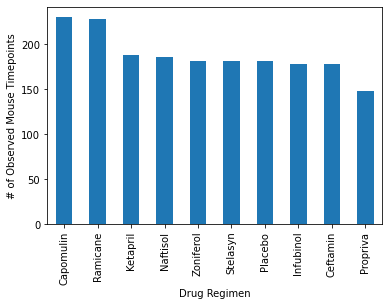

In [14]:
#Generate two bar charts. Both charts should be identical and show the total total number of rows 
#(Mouse ID/Timepoints) for each drug regimen throughout the study.

#Create the first bar chart with the Pandas DataFrame.plot() method.
pandas_barchart = clean_df['Drug Regimen'].value_counts()
pandas_barchart.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

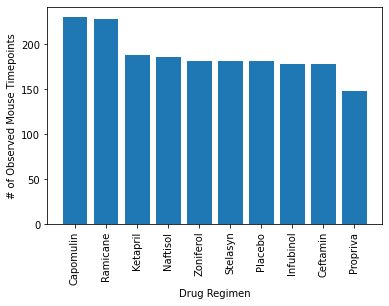

In [15]:
#Create the second bar chart with Matplotlib's pyplot methods.
plt.bar(pandas_barchart.index, pandas_barchart.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

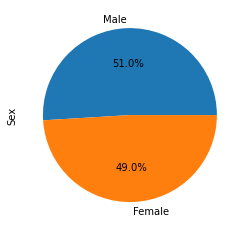

In [16]:
#Generate two pie charts. Both charts should be identical 
#and show the distribution of female versus male mice in the study.

#Create the first pie chart with the Pandas DataFrame.plot() method.
pandas_piechart = clean_df['Sex'].value_counts()
pandas_piechart.plot(kind='pie', autopct="%1.1f%%")
plt.show()

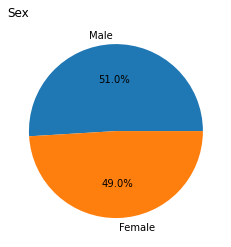

In [17]:
#Create the second pie chart with Matplotlib's pyplot methods.
matplot_piechart = clean_df['Sex'].value_counts()
plt.pie(matplot_piechart.values, labels = matplot_piechart.index, autopct='%1.1f%%')
plt.title('Sex',loc='left')
plt.show()

# Calculate Quartiles, Find Outliers, and Create a Box Plot

* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
* Capomulin, Ramicane, Infubinol, and Ceftamin. 
* Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all 
* four treatment regimens.Use the following substeps:

In [18]:
#Create a grouped DataFrame that shows the last (greatest) time point for each mouse.
max_tumor = clean_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
max_tumor

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [19]:
#Merge this grouped DataFrame with the original cleaned DataFrame.
merged_df2 = max_tumor.merge(clean_df, on= ["Mouse ID","Timepoint"], how="left")
merged_df2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [20]:
#Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

In [21]:
#Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 
#Append the resulting final tumor volumes for each drug to the empty list.
for treatment in treatment_names:
    
    final_tumor_volume = merged_df2.loc[merged_df2["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
   
    tumor_volume_data.append(final_tumor_volume)
    
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lower_quartiles = quartiles[.25]
    upper_quartiles = quartiles [.75]
    range = upper_quartiles-lower_quartiles
    upper_bounds = upper_quartiles + (1.5*range)
    lower_bounds = lower_quartiles - (1.5*range)
     
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bounds) | (final_tumor_volume  > upper_bounds)]
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


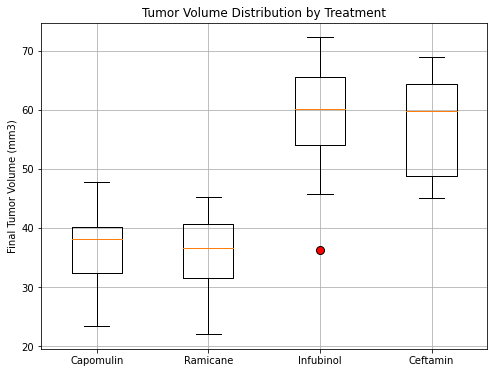

In [22]:
#Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume
#for all the mice in each treatment group. 
#Highlight any potential outliers in the plot by changing their color and style.

# Generate a box plot
plt.figure(figsize=(8,6))
plt.boxplot(tumor_volume_data, labels=treatment_names, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.title('Tumor Volume Distribution by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.grid(True)
plt.show()


# Create a Line Plot and a Scatter Plot (10 points)

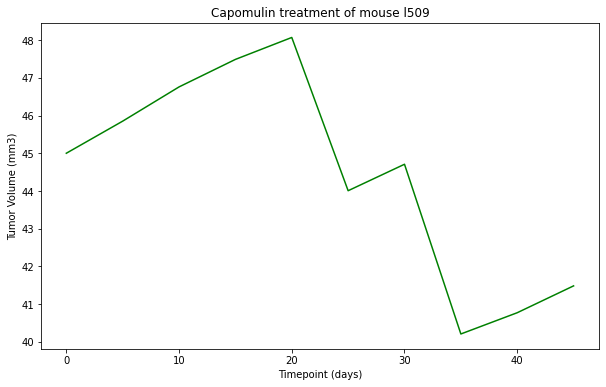

In [23]:
#Select a single mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.

treated_Capomulin = clean_df[clean_df["Drug Regimen"]== 'Capomulin']
mouse_id = 'l509'
mouse_data = treated_Capomulin[treated_Capomulin['Mouse ID'] == mouse_id]

# Show the graph that we have created
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'],color='green')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.show()


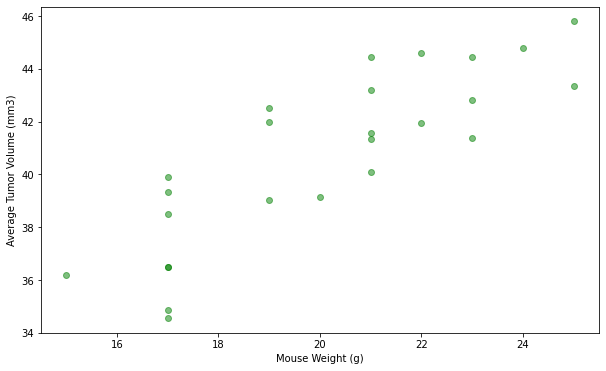

In [24]:
#Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen.

treated_Capomulin = clean_df[clean_df["Drug Regimen"]== 'Capomulin']

Capomulin_grouped_data = treated_Capomulin.groupby('Mouse ID').mean()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(Capomulin_grouped_data['Weight (g)'], Capomulin_grouped_data['Tumor Volume (mm3)'], color='green', alpha=0.5)

# Adding title and labels
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Displaying the plot
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


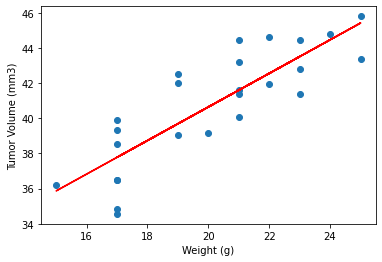

In [25]:
#Calculate Correlation and Regression
capomulin_dataset = clean_df[clean_df["Drug Regimen"] == 'Capomulin']

capomulin_average = capomulin_dataset.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

correlation_coefficient = round(st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])[0], 2)

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

model = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])

# Scatter plot
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])

# Regression line
slope = model.slope
intercept = model.intercept

plt.plot(capomulin_average['Weight (g)'], slope * capomulin_average['Weight (g)'] + intercept, color='red')

# Labels
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.show()